# Fine-Tuning your model

---

After training the model, the next task is to evaulate its performance. In this notebook, we will discuss about different metrics in `sklearn` used to evaulate the model more efficiently and how to optimize the classification and regression models using hyperparameter tuning.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Classification metrics

We learnt about the accuracy, which is the propotion of correct predictions to the total number of predictions. However, it's not always a useful metric specially for the case of *class-imbalance*.

For example, for the task of email spam classification, we usually have around 99% real email and only 1% spam. If we build a classifier that predicts all emails are real, it's accuracy will be 99% which is a high accuracy but it never predicts spam emails and thus fails to do its required purpose. This is because of the large ratio between the 2 classes which is known as *class-imbalace*.

For these cases, we need more nuanced (complex) metircs.


For binary classification, we can build a 2x2 table (matrix) recording the true and predicted values for each class like this,

![](assets/images/cm.png)

For the spam(positive)-real(negative) classification task:

* True Positive (TP) is the number of spam emails that were **correctly** classified as spam by our model
* False Negative (FN) is the number of spam emails that were **incorrectly** classified as real by our model
* Flase Positive (FP) is the number of real emails that were **incorrectly** classified as spam by our model
* True Negative (TN) is the number of real emails that were **correctly** classified as real by our model


This is called confusion matrix. From the confusion matrix, we can calculate the following:

* Accuracy : the ratio between the correct classifications (TP+TN) over the total number of classifications (TP+TN+FP+FN)

$$
\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

* **P**recision: the ratio of the true positives (T**P**) classifications over the total *predicted* positives (T**P**+F**P**) (given we predicted positive, what is the probability we predict a true positive). It's also called the positive-predicted value (PPV).

$$
\text{precision} = \frac{TP}{TP+FP}
$$

* Recall: the ratio of the true positives (TP) over the total *actual* positives (TP+FN). It's also called sensitivity, hit-rate, and true-positive-rate (TPR).

$$
\text{recall} = \frac{TP}{TP+FN}
$$

* F1-Score: it is the harmonic mean of precision and recall. It combines precision and recall into a single number using the following formula

$$
F1 = 2 * \frac{\text{precision}.\text{recall}}{\text{precision}+\text{recall}}
$$


Using these metrics for the spam classification,

* High precision: not many real emails predicted as spam
* High recall: many spam emails classified as spam
* High F1 score : high precision and high recall

***NOTE:*** Precision, Recall, and F1 Score usually calculated for the positive class but we can calculate it for the other class by defining that class as the positive one and repeat the calculations.

We can calculate the above metrics in addition to the confusion matrix from `sklearn.metrics`

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We will use the diabetes dataset provided in `diabetes.csv`. In this dataset, our target is to predict whether a patient will suffer from diabetes (positive class 1) or not (negative class 0) based on features like BMI, age, and number of pregnancies.

In [18]:
diabetes_df = pd.read_csv("assets/data/diabetes.csv")
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
X = diabetes_df.drop(columns=['diabetes']).values
y = diabetes_df.diabetes.values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [23]:
y_pred = knn.predict(X_test)

To build the confusion matrix,

In [24]:
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


***NOTE:*** The above confusion matrix **does not** follow the structure we talked about above. Instead, it follows this,

[![](assets/images/cm_sklearn.png)](https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79)

To create a classification report that reports:

* precision
* recall
* f1-score
* support (the number of samples that has this class)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## Logistic Regression and the ROC curve

Logistic regression generates linear decision boundary by outputing probabilities for binary classification. If the probability:

* is greater than **0.5**, it's labeled as class-1
* otherwise, it's labeled as class-0

0.5 here is called the threshold of the logistic regression, which can be tuned in order to build better models.

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [28]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

But what if we wanted to get the probailities for each class of the target? For that, we use `predict_proba` instead of `predict` which returns the target class for each sample.

In [29]:
y_probalities = log_reg.predict_proba(X_test)

In [30]:
y_probalities

array([[0.69412947, 0.30587053],
       [0.80287323, 0.19712677],
       [0.85944707, 0.14055293],
       [0.83574296, 0.16425704],
       [0.48560103, 0.51439897],
       [0.50392474, 0.49607526],
       [0.98325746, 0.01674254],
       [0.39633072, 0.60366928],
       [0.45345898, 0.54654102],
       [0.20607549, 0.79392451],
       [0.74520245, 0.25479755],
       [0.11438935, 0.88561065],
       [0.58195257, 0.41804743],
       [0.70424789, 0.29575211],
       [0.92728631, 0.07271369],
       [0.65876152, 0.34123848],
       [0.85192551, 0.14807449],
       [0.91736196, 0.08263804],
       [0.15558196, 0.84441804],
       [0.40207554, 0.59792446],
       [0.75683912, 0.24316088],
       [0.91366147, 0.08633853],
       [0.49282253, 0.50717747],
       [0.89212825, 0.10787175],
       [0.41955203, 0.58044797],
       [0.13373809, 0.86626191],
       [0.88161144, 0.11838856],
       [0.96581173, 0.03418827],
       [0.68130786, 0.31869214],
       [0.86988801, 0.13011199],
       [0.

`y_probabilities` is a numpy array of 2 columns. The first column is for class-0 and the second for class-1. Let's get those for class-1, the positive class.

In [31]:
y_probalities = log_reg.predict_proba(X_test)[:, 1]

For each threshold $p \in [0, 1]$, we can calculate the false positive rate (FPR) and the true postive rate (TPR).

$$
FPR = \frac{FP}{FP+TN}
$$

$$
TPR = \frac{TP}{TP+FN}
$$

At $p = 0$, we have for 20 spam (P) and 80 real (N):

* P = 100
* N = 0
* TP = 20
* FP = 80
* FN = 0
* TN = 0

which results in:

* TPR = 1
* FPR = 1

At $p = 1$, we have for 20 spam (P) and 80 real (N):

* P = 0
* N = 100
* TP = 0
* FP = 0
* FN = 20
* TN = 80

which results in:

* TPR = 0
* FPR = 0

which leads for this plot,

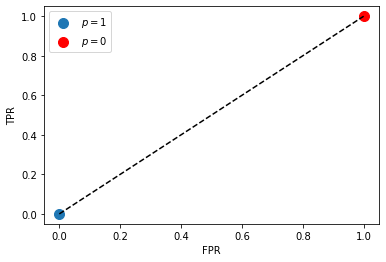

In [43]:
plt.plot([0, 1], [0, 1], linestyle = "--", color = "black")
plt.scatter([0], [0], s=100, label = "$p = 1$")
plt.scatter([1], [1], s=100, label = "$p = 0$", color = "red")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend();

The line represent a random model (a model that choses randomly). Our machine learning models should be above that line. Plotting the curve between FPR and TPR is called ROC (receiver operating characterstic) curve. We can calculate the TPR and its corresponding FPR at different thresholds using the `roc_curve` function from `sklearn.metrics`.

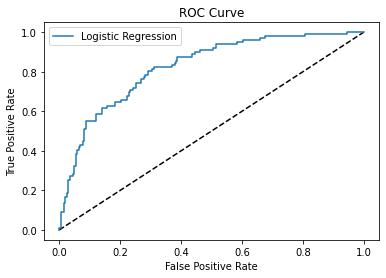

In [46]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probalities)

# Plot ROC curve

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend();

In [47]:
thresholds

array([1.97235171, 0.97235171, 0.95540122, 0.89074978, 0.879058  ,
       0.86626191, 0.86429078, 0.84441804, 0.84441271, 0.83008758,
       0.82455654, 0.794762  , 0.79392451, 0.7915534 , 0.7824504 ,
       0.7786393 , 0.77632375, 0.76643847, 0.76129665, 0.71488027,
       0.70772176, 0.70323883, 0.70048105, 0.69122519, 0.68388949,
       0.68097113, 0.67512827, 0.67138293, 0.67127606, 0.64694706,
       0.64620983, 0.62052384, 0.59887664, 0.58371164, 0.55516501,
       0.54769112, 0.5440379 , 0.53617222, 0.5065688 , 0.50129901,
       0.48601982, 0.47202311, 0.4436633 , 0.43599132, 0.42354066,
       0.40636768, 0.4062533 , 0.40041293, 0.3957907 , 0.39229   ,
       0.3763916 , 0.36725825, 0.35072273, 0.34837084, 0.3423711 ,
       0.34123848, 0.33913948, 0.33555437, 0.32567255, 0.31316825,
       0.3083825 , 0.30591928, 0.30587053, 0.30376984, 0.27984941,
       0.27428839, 0.26711987, 0.26400954, 0.25653506, 0.25618631,
       0.25603014, 0.25382418, 0.24200452, 0.23981173, 0.23599

## Area under the ROC curve (AUC)

The higher the ROC of our model is above the random model line (dashed-black), the better the model is. To measure the quality of the model using ROC, we calculate the area under it. The area is known as **AUC** and it is in the range [0, 1]. We can calculate the AUC using `roc_auc_score` from `sklearn.metrics`.

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probalities)

0.8243384732533791

We can also apply cross validation for the AUC scores to insure it is not dependent on the `X_test`. We specify that we want to use the AUC score as our metric by setting `scoring` argument to `roc_auc`.

In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring="roc_auc")

cv_scores

array([0.81222222, 0.80777778, 0.82574074, 0.87283019, 0.84471698])

## Hyperparameter Tuning

Any parameters that need to be specified before fitting the model to that data as they cannot be be learned by fitting are called ***hyperparameters***.

For example: $\lambda$ in Ridge and Lasso, $k$ in KNN.

To choose the best set of hyperparameters (a model can have more than one hyperparameter), we can try all combinations of hyperparameters values and fit each separately and choose the best forming one based on the cross-validation results. This is called **Grid Search Cross Validation**.

Let's say we have a model that has 2 hyperparmeters $C$ and $\alpha$. The grid search applies fitting the model using each combination of these hyperparameters let's say each has the range of [0.1, 0.5], calculates the cross valiadtion scores mean and takes the combination of hypeparameters that has the highest mean score.

![](assets/images/grid-search.png)

We can see that the model produced the highest mean score in that grid is at $\alpha = 0.2$ and $C = 0.3$. We can use grid search cross validation in sklearn by this

```python
from sklearn.model_selection import GridSearchCV

param_gird = {
    "param_1": np.arange(min1, max1),
    "param_2": np.arange(min2, max2),
    "param_3": np.arange(min3, max3),
}

# check the docs of each model for the names of the hyperparameters.

reg_cv = GirdSearchCV(reg, param_grid, cv = 5)

# apply the grid search by fitting the data
reg_cv.fit(X, y)

# look at the best parameters selected by the grid search
reg_cv.best_params_, reg_cv.best_socre_
```

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [51]:
knn_cv.best_params_

{'n_neighbors': 14}

In [53]:
knn_cv.best_score_

0.7578558696205755

`GridSearchCV` can be computationally expensive especially if we are searching over a larget hyperparameter space and dealing with multiple hyperparameters. One solution is to use `RandomizedSearchCV` which doesn't search over all combinations of hyperparameters. Instead, a fixed number of hyperparameter settings is sampled from the provided spaces. We will use `RandomizedSearchCV` with the decision tree classifier over 4 hyperparameters; `criterion`, `min_samples_leaf`, `max_features` and `max_depth`.

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X, y)
tree_cv.best_params_, tree_cv.best_score_

({'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 6,
  'min_samples_leaf': 7},
 0.7461336049571343)

***NOTE:*** The combinations of hyperparameters fitted to the data aren't the same each execution, results will probably change in terms of best score and parameters.

## Hold-out set for the final evaluation

Using all data for corss-validation is not ideal. Estimating the perfomance on any of it may not provide an accuracte picture of how it will perform on unseen data. So, it's important to split the data before applying cross validation into training and test set. The test can be called the ***hold-out*** set.

We use the training set to perfom cross-validation to tune the model's hyperparameters and use the hold-out set to test how well the model can be expeceted to perfrom on a dataset it has never seen before.